In [504]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [505]:
import FinanceDataReader as fdr
df_=fdr.DataReader('SPY','2018-1-1','2019-1-1').iloc[:,:5]

https://github.com/bukosabino/ta

https://technical-analysis-library-in-python.readthedocs.io/en/latest/

https://school.stockcharts.com/doku.php

https://www.investopedia.com/

In [506]:
import ta

In [507]:
def plot(series):
    plt.figure(figsize=(8,4))
    plt.plot(series)
    plt.title(series.name)
    plt.show()
    
def corrmat(a,b, name1,name2):
    return pd.DataFrame({name1:a,name2:b}).dropna().corr()

def sma(series, window):
    return series.rolling(window).mean()

In finance, technical analysis is an analysis methodology for forecasting the direction of prices through the study of past market data, primarily price and volume. Behavioral economics and quantitative analysis use many of the same tools of technical analysis, which, being an aspect of active management, stands in contradiction to much of modern portfolio theory. The efficacy of both technical and fundamental analysis is disputed by the efficient-market hypothesis, which states that stock market prices are essentially unpredictable, and research on whether technical analysis offers any benefit has produced mixed results.

https://en.wikipedia.org/wiki/Technical_analysis

bukosabino's *ta* 42 indicators

Volume

- Money Flow Index (MFI)
- Accumulation/Distribution Index (ADI)
- On-Balance Volume (OBV)
- Chaikin Money Flow (CMF)
- Force Index (FI)
- Ease of Movement (EoM, EMV)
- Volume-price Trend (VPT)
- Negative Volume Index (NVI)
- Volume Weighted Average Price (VWAP)

Volatility

- Average True Range (ATR)
- Bollinger Bands (BB)
- Keltner Channel (KC)
- Donchian Channel (DC)
- Ulcer Index (UI)


Trend

- Simple Moving Average (SMA)
- Exponential Moving Average (EMA)
- Weighted Moving Average (WMA)
- Moving Average Convergence Divergence (MACD)
- Average Directional Movement Index (ADX)
- Vortex Indicator (VI)
- Trix (TRIX)
- Mass Index (MI)
- Commodity Channel Index (CCI)
- Detrended Price Oscillator (DPO)
- KST Oscillator (KST)
- Ichimoku Kinkō Hyō (Ichimoku)
- Parabolic Stop And Reverse (Parabolic SAR)
- Schaff Trend Cycle (STC)


Momentum
- Relative Strength Index (RSI)
- Stochastic RSI (SRSI)
- True strength index (TSI)
- Ultimate Oscillator (UO)
- Stochastic Oscillator (SR)
- Williams %R (WR)
- Awesome Oscillator (AO)
- Kaufman's Adaptive Moving Average (KAMA)
- Rate of Change (ROC)
- Percentage Price Oscillator (PPO)
- Percentage Volume Oscillator (PVO)


Others
- Daily Return (DR)
- Daily Log Return (DLR)
- Cumulative Return (CR)

In [508]:
close = df_.Close
low = df_.Low
open = df_.Open
high = df_.High
volume = df_.Volume
ret = close.pct_change().dropna().rename('ret')
sma_ret = close.rolling(14).mean().pct_change().dropna().rename('sma_ret')
mom = close.diff().dropna().rename('momentum')
mom_volume = volume.diff().dropna().rename('volume_momentum')

In [509]:
allta = ta.add_all_ta_features(df_,'Open','High','Low','Close','Volume')

C:\Users\JHCho\anaconda3\envs\py37\lib\site-packages\ta\trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
C:\Users\JHCho\anaconda3\envs\py37\lib\site-packages\ta\trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


In [510]:
names = allta.columns
len(names)

88

In [511]:
ohlcv = names[0:5]
volumes = names[5:15]
volatility = names[15:36]
trend = names[36:70]
momentum = names[70:85]
others = names[85:]

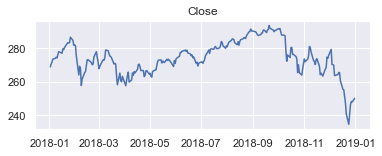

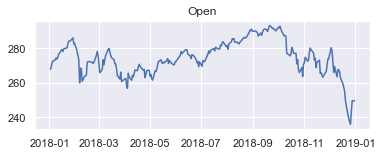

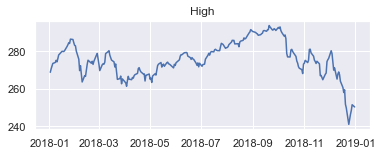

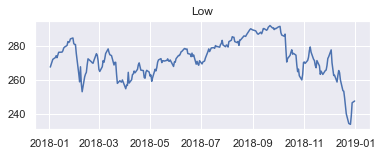

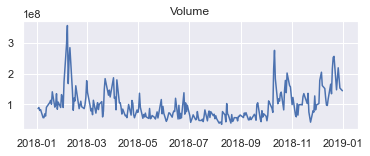

In [512]:
for i in ohlcv:
    plt.figure(figsize=(6,2))
    plt.plot(allta[i])
    plt.title(i)
    plt.show()

Let us see in depth

# Volume

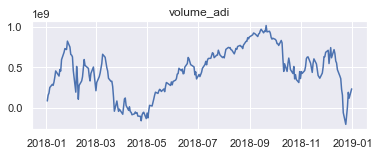

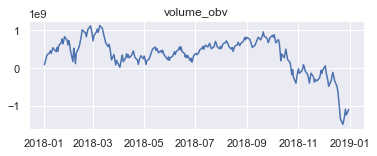

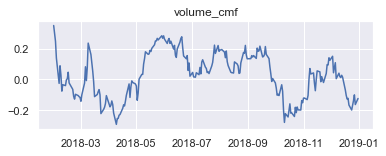

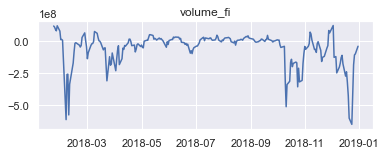

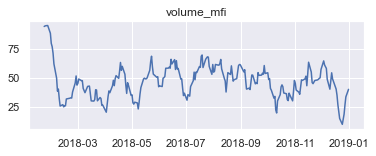

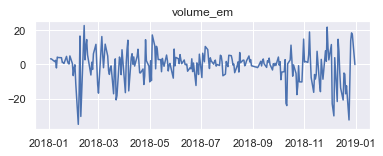

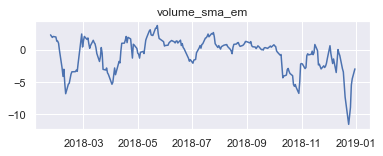

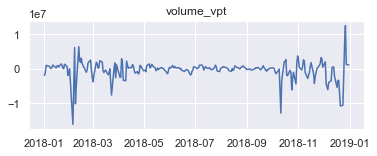

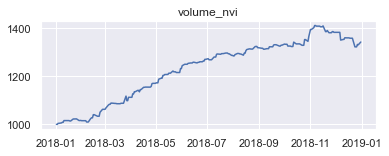

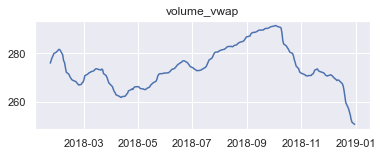

In [513]:
for i in volumes:
    plt.figure(figsize=(6,2))
    plt.plot(allta[i])
    plt.title(i)
    plt.show()

In [514]:
df_volumes = allta[volumes].join([ret,sma_ret,close])

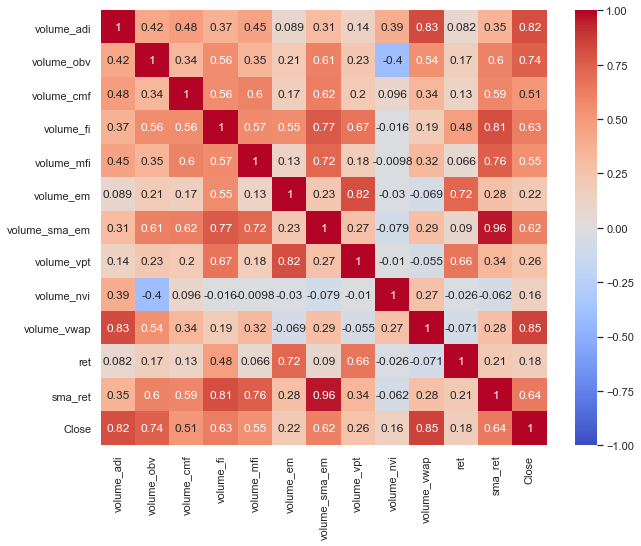

In [515]:
plt.figure(figsize=(10,8))
sns.heatmap(df_volumes.corr(), cmap='coolwarm',vmin=-1,vmax=1, annot=True)
plt.show()

In [516]:
# Highly correlated market features
corr = df_volumes.corr()
h = 0.75
where = (abs(corr)>h) & (corr<1)

hc_list =[]
for i in range(len(np.where(where)[0])):
    hc_list.append(sorted([corr.columns[np.where(where)[0][i]], corr.columns[np.where(where)[1][i]]]))
hc_list = np.array(sorted(hc_list))[::2,:]
print('Pairs of above-{}-correlated features : \n '.format(h) , hc_list)

Pairs of above-0.75-correlated features : 
  [['Close' 'volume_adi']
 ['Close' 'volume_vwap']
 ['sma_ret' 'volume_fi']
 ['sma_ret' 'volume_mfi']
 ['sma_ret' 'volume_sma_em']
 ['volume_adi' 'volume_vwap']
 ['volume_em' 'volume_vpt']
 ['volume_fi' 'volume_sma_em']]


## Accumulation/Distribution Index (ADI)
1. Money Flow Multiplier = [(Close  -  Low) - (High - Close)] /(High - Low) 

2. Money Flow Volume = Money Flow Multiplier x Volume for the Period

3. ADL(ADI) = Previous ADL + Current Period's Money Flow Volume


- Accumulation Distribution Line is a volume-based indicator designed to measure the cumulative flow of money into and out of a security. 
- As with cumulative indicators, the ADL is a running total of each period's Money Flow Volume. 
- Chartists can use this indicator to affirm a security's underlying trend or anticipate reversals when the indicator diverges from the security price.

- The A/D line is used to help assess price trends and potentially spot forthcoming reversals. 
- If a security’s price is in a downtrend while the A/D line is in an uptrend, then the indicator shows there may be buying pressure and the security’s price may reverse to the upside. Conversely, if a security’s price is in an uptrend while the A/D line is in a downtrend, then the indicator shows there may be selling pressure, or higher distribution. This warns that the price may be due for a decline.

In [517]:
money_flow_mult = ((close - low) - (high - close)) /(high - low)
money_flow_mult = money_flow_mult.rename('Money Flow Multiplier')
money_flow_volume = money_flow_mult * volume
money_flow_volume = money_flow_volume.rename('Money Flow Volume')

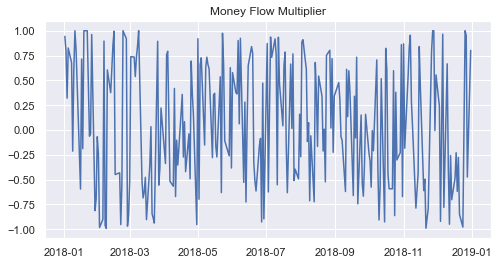

In [518]:
plot(money_flow_mult)

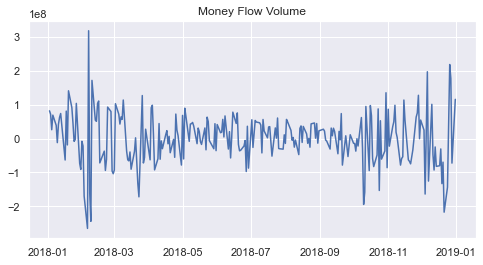

In [519]:
plot(money_flow_volume)

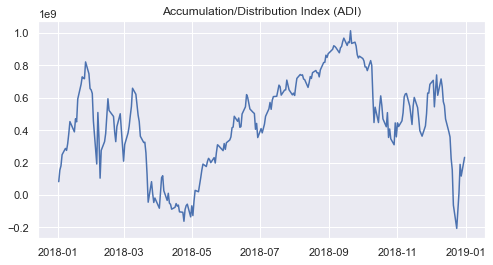

In [520]:
adi = money_flow_volume.cumsum()
adi = adi.rename('Accumulation/Distribution Index (ADI)')
plot(adi)

Usage

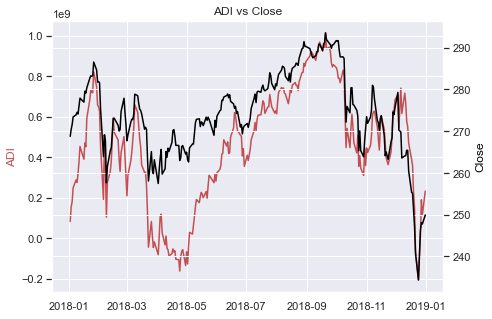

In [521]:
fig, ax1 = plt.subplots(figsize=(7,5))

ax2 = ax1.twinx()
ax1.plot(adi,color='r')
ax2.plot(close,c='black')
ax1.set_ylabel('ADI',c='r')
ax2.set_ylabel('Close',c='black')
plt.title('ADI vs Close')
plt.show()

Limitations of Using the Accumulation/Distribution Indicator (A/D)


- The A/D indicator does not factor in price changes from one period to the next, and focuses only on where the price closes within the current period’s range. This creates some anomalies.

- Also, one of the main uses of the indicator is to monitor for divergences. Divergences can last a long time and are poor timing signals. When divergence appears between the indicator and price, it doesn’t mean a reversal is imminent. It may take a long time for the price to reverse, or it may not reverse at all.

## Chaikin Money Flow (CMF)

1. Money Flow Multiplier = [(Close  -  Low) - (High - Close)] /(High - Low) 

2. Money Flow Volume = Money Flow Multiplier x Volume for the Period

3. 20-period CMF = 20-period Sum of Money Flow Volume / 20 period Sum of Volume 


- Chaikin Money Flow sums Money Flow Volume for a specific look-back period, typically 20 or 21 days. 
- The resulting indicator fluctuates above/below the zero line just like an oscillator. 
- Chartists weigh the balance of buying or selling pressure with the absolute level of Chaikin Money Flow. Additionally, chartists can look for crosses above or below the zero line to identify changes on money flow.

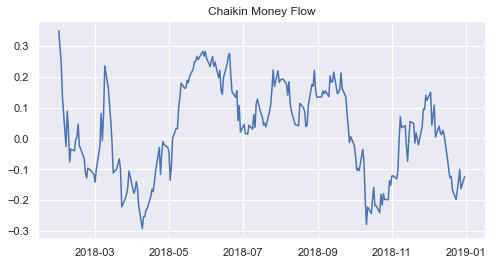

In [522]:
cmf = money_flow_volume.rolling(20).sum() / volume.rolling(20).sum()
cmf = cmf.rename('Chaikin Money Flow')
plot(cmf)

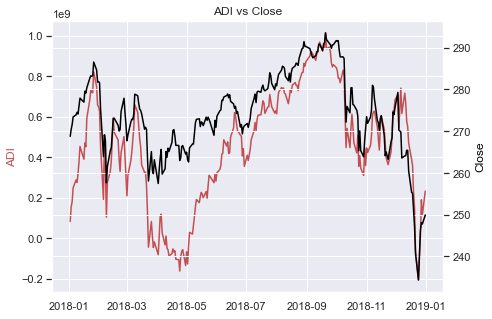

In [523]:
fig, ax1 = plt.subplots(figsize=(7,5))

ax2 = ax1.twinx()
ax1.plot(adi,color='r')
ax2.plot(close,c='black')
ax1.set_ylabel('ADI',c='r')
ax2.set_ylabel('Close',c='black')
plt.title('ADI vs Close')
plt.show()

In [524]:
corrmat(cmf,adi,'cmf','adi')

,cmf,adi
cmf,1.000000,0.483515
adi,0.483515,1.000000




they have trend.
So, we can log diff them, or simply use Money flow volume instead.


## Ease of movement (EoM, EMV)

Distance Moved = ((H + L)/2 - (Prior H + Prior L)/2) 

Box Ratio = ((V/100,000,000(scale)/(H - L))

1-Period EMV = ((H + L)/2 - (Prior H + Prior L)/2) / ((V/100,000,000)/(H - L))

1-Period EMV = Distance Moved / Box Ratio

14-Period Ease of Movement = 14-Period simple moving average of 1-period EMV


- Ease of Movement (EMV) is a volume-based oscillator that fluctuates above and below the zero line. 
- As its name implies, it is designed to measure the “ease” of price movement.
- In general, prices are advancing with relative ease when the oscillator is in positive territory. Conversely, prices are declining with relative ease when the oscillator is in negative territory.

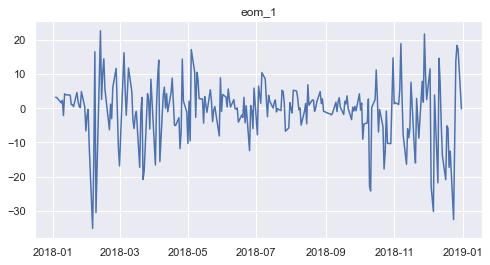

In [525]:
eom = ta.volume.ease_of_movement(high,low,volume,1)
plot(eom)

In [526]:
corrmat(eom, close.pct_change(),'eom_1','ret1')

,eom_1,ret1
eom_1,1.000000,0.722544
ret1,0.722544,1.000000


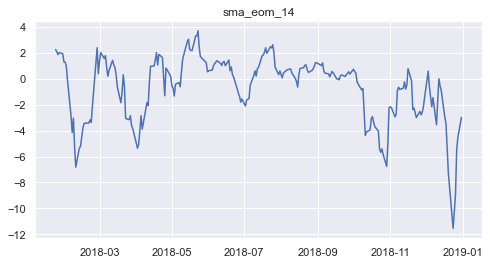

In [527]:
smaeom = ta.volume.sma_ease_of_movement(high,low,volume,window=14)
plot(smaeom)

In [528]:
corrmat(smaeom, sma_ret,'sma_eom_14','sma_ret_14')

,sma_eom_14,sma_ret_14
sma_eom_14,1.000000,0.962483
sma_ret_14,0.962483,1.000000


## Money Flow Index (MFI)

1. Typical Price = (High + Low + Close)/3

2. Raw Money Flow = Typical Price x Volume
3. Money Flow Ratio = (14-period Positive Money Flow)/(14-period Negative Money Flow)

4. Money Flow Index = 100 - 100/(1 + Money Flow Ratio)

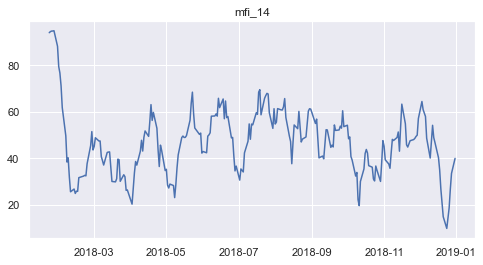

In [529]:
mfi = ta.volume.money_flow_index(high,low,close,volume,14)
plot(mfi)

In [530]:
mfi.describe()

count    238.000000
mean      47.076062
std       14.324633
min        9.863313
25%       37.076066
50%       47.563487
75%       54.829667
max       94.820029
Name: mfi_14, dtype: float64

In [531]:
corrmat(mfi, sma_ret,'mfi_14','sma_ret_14')

,mfi_14,sma_ret_14
mfi_14,1.000000,0.757298
sma_ret_14,0.757298,1.000000


mfi, sma_eom, sma of returns are all highly correlated.

## Force Index (FI)

Force Index(1) = {Close (current period)  -  Close (prior period)} x Volume

Force Index(13) = 13-period EMA of Force Index(1)

- The Force Index is an indicator that uses price and volume to assess the power behind a move or identify possible turning points. 
- It is simply ema of momentum x volume
- The Force Index can be used to reinforce the overall trend, identify playable corrections or foreshadow reversals with divergences.

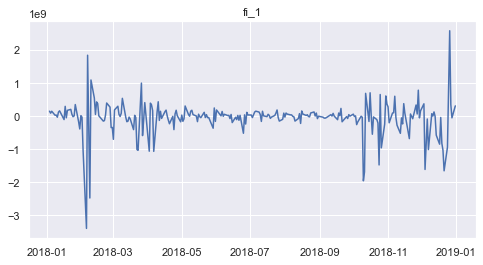

In [532]:
fi_1 = ta.volume.force_index(close,volume,window=1)
plot(fi_1)

In [533]:
corrmat(fi_1, close.pct_change(),'fi_1','ret1')

,fi_1,ret1
fi_1,1.000000,0.927849
ret1,0.927849,1.000000


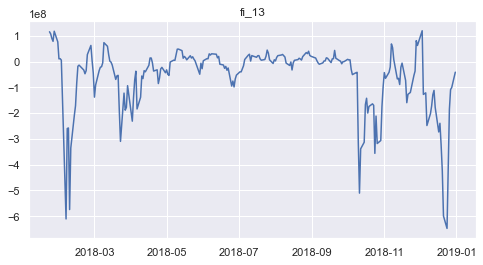

In [534]:
fi_13 = ta.volume.force_index(close,volume,window=13)
plot(fi_13)

In [535]:
corrmat(fi_13, ta.trend.ema_indicator(close,window=13).pct_change(),'fi_13','ema_ret_13')

,fi_13,ema_ret_13
fi_13,1.000000,0.951634
ema_ret_13,0.951634,1.000000


we can replace price difference(returns) or ema of them with force index. 

## Negative Volume Index (NVI)

1. Cumulative NVI starts at 1000

2. Add the Percentage Price Change to Cumulative NVI when Volume Decreases

3. Cumulative NVI is Unchanged when Volume Increases

4. Apply a 255-day EMA for Signals


- The Negative Volume Index (NVI) is a cumulative indicator that uses the change in volume to decide when the smart money is active. 


- Dysart's Negative Volume Index works under the assumption that the smart money is active on days when volume decreases and the not-so-smart money is active on days when volume increases.

In [536]:
nvi = ta.volume.negative_volume_index(close,volume)

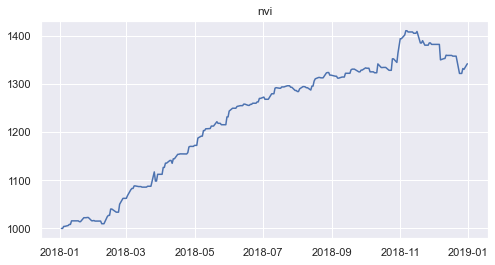

In [537]:
plot(nvi)

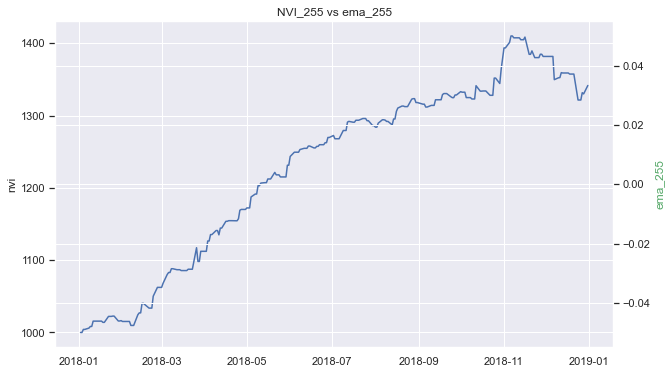

In [538]:
ema_close_255 = ta.trend.ema_indicator(close,window=255)

fig, ax1 = plt.subplots(figsize=(10,6))

ax2 = ax1.twinx()
ax1.plot(nvi)
ax2.plot(ema_close_255,color='g')
ax1.set_ylabel('nvi')
ax2.set_ylabel('ema_255',c='g')
plt.title('NVI_255 vs ema_255')
plt.show()

## On-balance volume (OBV)

If the closing price is above the prior close price then: 
Current OBV = Previous OBV + Current Volume


If the closing price is below the prior close price then: 
Current OBV = Previous OBV  -  Current Volume


If the closing prices equals the prior close price then:
Current OBV = Previous OBV (no change)


- On Balance Volume (OBV) measures buying and selling pressure as a cumulative indicator, adding volume on up days and subtracting it on down days. 

- Chartists can look for divergences between OBV and price to predict price movements or use OBV to confirm price trends.

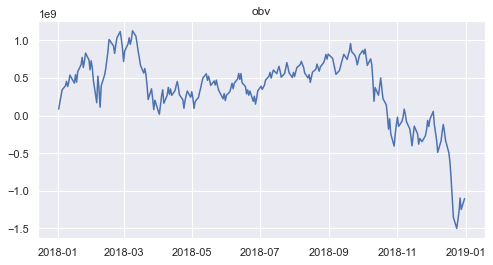

In [539]:
obv = ta.volume.on_balance_volume(close,volume)
plot(obv)

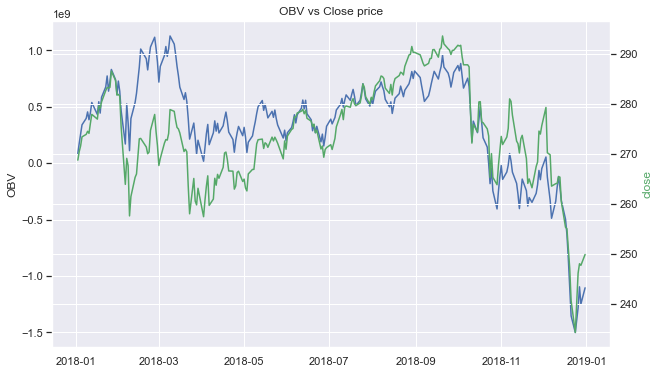

In [540]:
fig, ax1 = plt.subplots(figsize=(10,6))

ax2 = ax1.twinx()
ax1.plot(obv)
ax2.plot(close,color='g')
ax1.set_ylabel('OBV')
ax2.set_ylabel('close',c='g')
plt.title('OBV vs Close price')
plt.show()

## Volume-price trend (VPT)

VPT = VPT(previous) + volume x (close-close_prev)/close_prev

Is based on a running cumulative volume that adds or substracts a multiple of the percentage change in share price trend and current volume, depending upon the investment’s upward or downward movements.

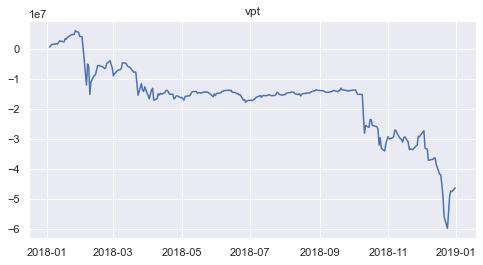

In [541]:
vpt = (volume*ret).cumsum().rename('vpt')
plot(vpt)

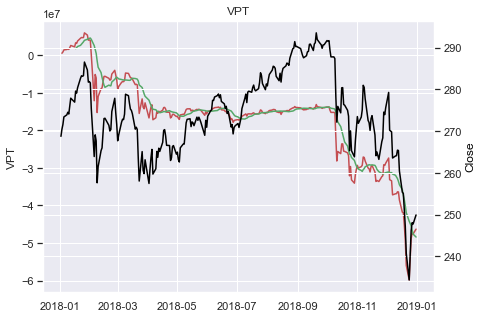

In [542]:
vpt_10 = vpt.rolling(10).mean()

fig, ax1 = plt.subplots(figsize=(7,5))

ax2 = ax1.twinx()
ax1.plot(vpt,color='r')
ax1.plot(vpt_10,color='g')
ax2.plot(close,c='black')
ax1.set_ylabel('VPT')
ax2.set_ylabel('Close',c='black')
plt.title('VPT')
plt.show()

## Volume Weighted Average Price (VWAP)

Cumulative(Volume x Typical Price)/Cumulative(Volume)

Volume-Weighted Average Price (VWAP) is exactly what it sounds like: the average price weighted by volume. 

VWAP equals the dollar value of all trading periods divided by the total trading volume for the current day. 


In [543]:
vwap = ta.volume.volume_weighted_average_price(high,low,close,volume)

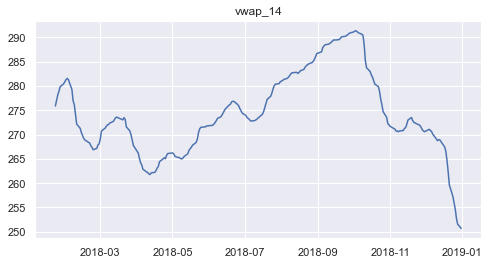

In [544]:
plot(vwap)

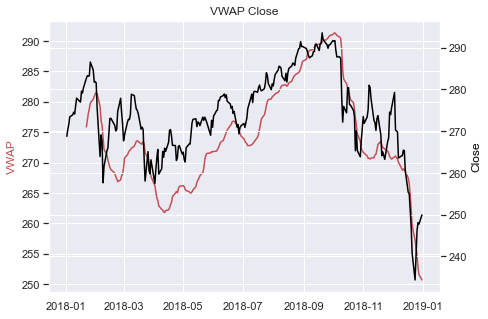

In [545]:
fig, ax1 = plt.subplots(figsize=(7,5))

ax2 = ax1.twinx()
ax1.plot(vwap,color='r')
ax2.plot(close,c='black')
ax1.set_ylabel('VWAP',c='r')
ax2.set_ylabel('Close',c='black')
plt.title('VWAP Close')
plt.show()

# Conclusion

Money Flow Index (MFI)

Accumulation/Distribution Index (ADI)

On-Balance Volume (OBV)

Chaikin Money Flow (CMF)

Force Index (FI)

Ease of Movement (EoM, EMV)

Volume-price Trend (VPT)

Negative Volume Index (NVI)

Volume Weighted Average Price (VWAP)

What indicator can we use for features?

- It should not have trend.
- Most of these indicators are trend x volume, and cumulative sums.
- Let's find out which indicators are stationary.
    - Money flow volume, which is used for calculating ADI and CMF
    - EOM (1-period)
    - Force index(1-period)
- Or we can use difference of indicators itself and its ma(signal line).
- Or we can use log-diff (returns) of indicators

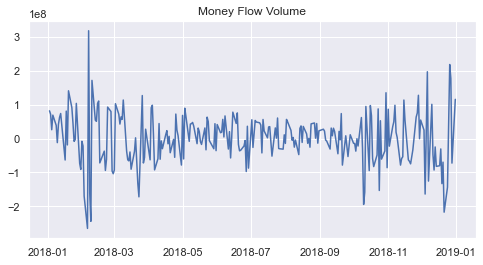

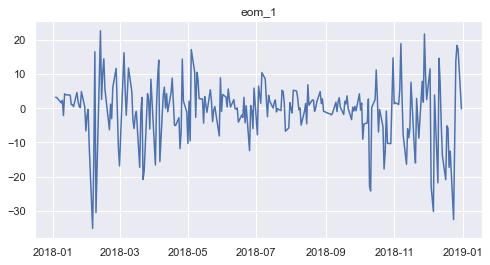

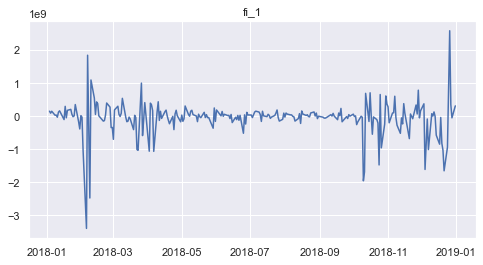

In [546]:
# possible features
vpr = (volume*ret).rename('volume price return')

plot(money_flow_volume)
plot(eom)
plot(fi_1)

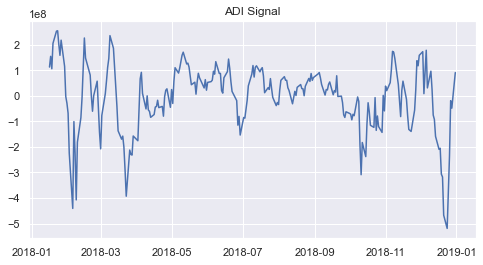

In [547]:
adi_sig = (adi-sma(adi,10)).rename('ADI Signal')
plot(adi_sig)

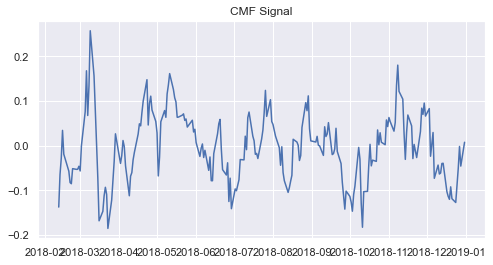

In [548]:
cmf_sig = (cmf-sma(cmf,10)).rename('CMF Signal')
plot(cmf_sig)

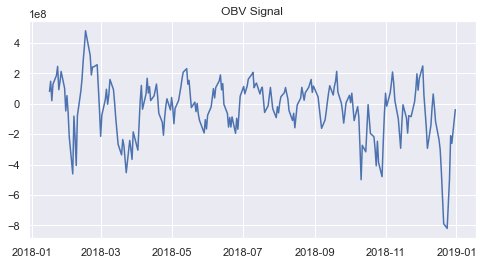

In [549]:
obv_sig = (obv-sma(obv,10)).rename('OBV Signal')
plot(obv_sig)

In [550]:
features = pd.DataFrame([money_flow_volume,eom,fi_1,adi_sig,cmf_sig,obv_sig]).T.dropna()
features

,Money Flow Volume,eom_1,fi_1,ADI Signal,CMF Signal,OBV Signal
Date,,,,,,
2018-02-12,5.400325e+07,22.592528,5.519616e+08,-8.534760e+07,-0.137554,84846000.0
2018-02-13,5.079317e+07,2.567471,5.360520e+07,-6.857462e+06,-0.065065,164993000.0
2018-02-14,1.033704e+08,10.315140,4.334566e+08,1.130556e+08,-0.028426,284481000.0
2018-02-15,1.106792e+08,14.418930,3.825280e+08,2.270139e+08,0.033998,374299000.0
2018-02-16,-7.205751e+07,5.494639,1.283360e+07,1.484116e+08,-0.019231,479978000.0
...,...,...,...,...,...,...
2018-12-24,-1.441710e+08,-32.513271,-9.368916e+08,-5.191808e+08,-0.127313,-820366000.0
2018-12-26,2.184900e+08,13.727997,2.586922e+09,-2.349021e+08,-0.050835,-495190000.0
2018-12-27,1.774856e+08,18.307376,3.520503e+08,-1.868860e+07,-0.001912,-211063000.0


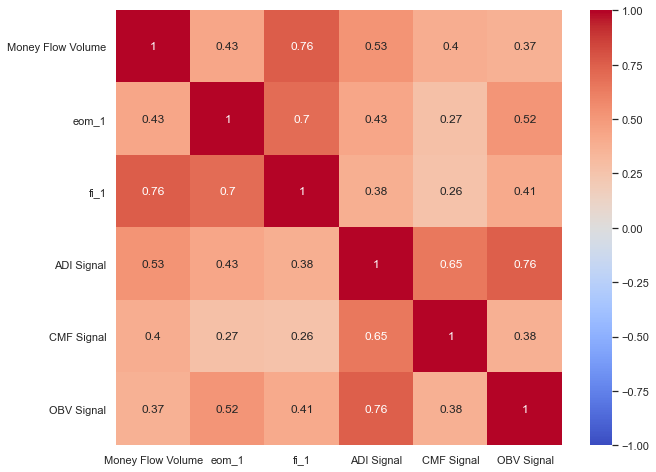

In [551]:
plt.figure(figsize=(10,8))
sns.heatmap(features.corr(), cmap='coolwarm',vmin=-1,vmax=1, annot=True)
plt.show()

For fewer features we can drop force index and ADI signal.

In [552]:
features = features.drop(columns=['fi_1','ADI Signal'])

In [553]:
from sklearn.preprocessing import MinMaxScaler

In [554]:
def minmaxscaler(x):
    scaler = MinMaxScaler()
    return pd.DataFrame(scaler.fit_transform(x),columns=x.columns,index = x.index)

In [555]:
features = minmaxscaler(features)
features

,Money Flow Volume,eom_1,CMF Signal,OBV Signal
Date,,,,
2018-02-12,0.622779,1.000000,0.107996,0.696133
2018-02-13,0.615418,0.636607,0.271920,0.757768
2018-02-14,0.735994,0.777203,0.354773,0.849657
2018-02-15,0.752755,0.851674,0.495937,0.918730
2018-02-16,0.333682,0.689726,0.375568,1.000000
...,...,...,...,...
2018-12-24,0.168303,0.000000,0.131153,0.000000
2018-12-26,1.000000,0.839136,0.304100,0.250069
2018-12-27,0.905964,0.922238,0.414732,0.468571


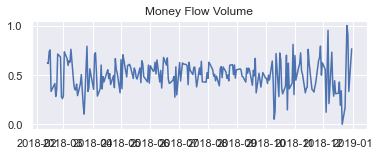

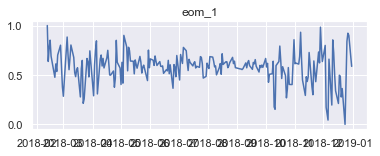

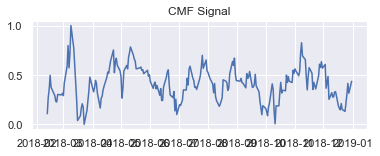

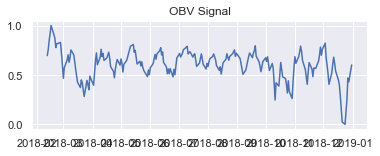

In [556]:
for i in features:
    plt.figure(figsize=(6,2))
    plt.plot(features[i])
    plt.title(i)
    plt.show()

In [564]:
y = np.sign(close.diff(-3)).rename('Direction after 3 day')

C:\Users\JHCho\anaconda3\envs\py37\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in sign
  result = getattr(ufunc, method)(*inputs, **kwargs)


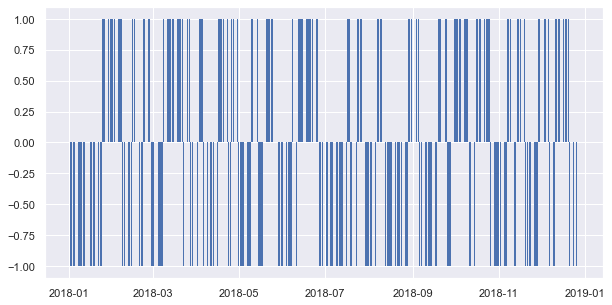

In [565]:
plt.figure(figsize=(10,5))
plt.bar(y.index,y, linewidth=0)
plt.show()

In [566]:
data = features.join(y).dropna()

In [567]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [568]:
from sklearn.ensemble import RandomForestClassifier

In [569]:
rf = RandomForestClassifier()
rf.fit(X,y)

RandomForestClassifier()

In [570]:
rf.feature_importances_

array([0.24675171, 0.23333173, 0.25262582, 0.26729075])